# Task M5 T01
## Introduction to Hypothesis Testing and Machine Learning

#### - Exercise 1

Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In [70]:
import pandas as pd

df_main = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding = 'ISO-8859-1',index_col=0, engine='python')

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

In [71]:
df_main.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Describe the variables in the data set:

- Squad: Name of the team.
- Country: Country where the computer is located.
- LgRk: position of the team in the league table.
- MP: number of games played by the team in the league.
- W: number of matches won by the team in the league.
- D: number of games tied by the team in the league.
- L: number of games lost by the team in the league.
- GF: number of goals scored by the team in the league.
- GA:  number of goals conceded by the team in the league.
- GD:  goal difference of the team in the league (GF - GA).
- Pts:  number of points obtained by the team in the league.
- Pts/G:  average number of points obtained by the team per game.
- xG:  expected value of the goals scored by the team based on the chances created.
- xGA:  expected value of the goals conceded by the team based on the opportunities granted.
- xGD:  team's expected goal difference based on chances created and conceded (xG - xGA).
- xGD/90:  team's expected goal difference per game based on chances created and conceded.
- Last 5:  team's performance in its last five games.
- Attendance:  average number of attendees at the team's matches.
- Top Team Scorer:  player from the team that scored the most goals in the league.
- Goalkeeper:  team's starting goalkeeper in the league.

In [79]:
# count the total number of null values in the DataFrame
total_nulls = df_main.isnull().sum().sum()

# calculate the percentage of null values in the DataFrame
null_percent = (total_nulls / (df_main.shape[0] * df_main.shape[1])) * 100

# print the total number of null values and the percentage of null values
print("Total number of nulls: ", total_nulls)
print("Percentage of null values: ", null_percent, "%")

# get a summary of null values per column
null_summary = df_main.isnull().sum()
print("\nSummary of null values by column:\n", null_summary)

# get a summary of non-null values per column
not_null_summary = df_main.notnull().sum()
print("\nSummary of non-null values by column:\n", not_null_summary)

# get a summary of the unique values per column
unique_summary = df_main.nunique()
print("\nSummary of unique values per column:\n", unique_summary)

Total number of nulls:  0
Percentage of null values:  0.0 %

Summary of null values by column:
 Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

Summary of non-null values by column:
 Squad              98
Country            98
LgRk               98
MP                 98
W                  98
D                  98
L                  98
GF                 98
GA                 98
GD                 98
Pts                98
Pts/G              98
xG                 98
xGA                98
xGD                98
xGD/90             98
Last 5             98
Attendance         98
Top Team Scorer    98
Goalkeeper   

We used the t-test hypothesis test

We select the variable to study and see a summary of the data.

In [24]:
df_main['W'].describe().round(2)

count    98.00
mean     13.45
std       5.75
min       3.00
25%       9.00
50%      13.00
75%      17.00
max      28.00
Name: W, dtype: float64

We put forward the hypothesis:
- H0 --> The average number of matches won or less.

- H1 --> A number greater than the mean.

In [87]:
from scipy import stats

x = df_main['W'] # matches won

h0_mean = 13
h1_mean = 14

alpha = 0.05

t_statistic, p_value = stats.ttest_1samp(x, h0_mean, alternative='greater')

print("p-value:", p_value)

if p_value < alpha:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is not rejected")

p-value: 0.22060496484947323
Null hypothesis is not rejected


The null hypothesis is accepted, which means that most of the values are from the mean downwards.

#### - Exercise 2
With the same dataset select two other attributes from the dataset. Calculate the p-values and say whether they reject the null hypothesis by taking an alpha of 5%.

In [69]:
from scipy import stats

# Select two attributes to compare
x = df_main['LgRk'] # position of the team in the league table
y = df_main['D'] # number of games tied by the team in the league
alpha = 0.05

# Calculate the p-value
t_statistic, p_value = stats.ttest_ind(x, y)

print("p-value:", p_value)

if p_value < alpha:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is not rejected")


p-value: 0.1618934617852936
Null hypothesis is not rejected


#### - Exercise 3
Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%. 

In [68]:
from scipy import stats
import pandas as pd

# Select three attributes to compare
x = df_main['GF'] # Goals scored
y = df_main['GA'] # Goals conceded
z = df_main['Pts'] # Points obtained
alpha = 0.05

# Calculate p-value
f_statistic, p_value = stats.f_oneway(x, y, z)

print("p-value:", p_value)

if p_value < alpha:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is not rejected")


p-value: 0.8343960173045175
Null hypothesis is not rejected


In this case, the null hypothesis is accepted, which means that the data in the investigation follow a similar distribution.
To see this we can graph the variables.

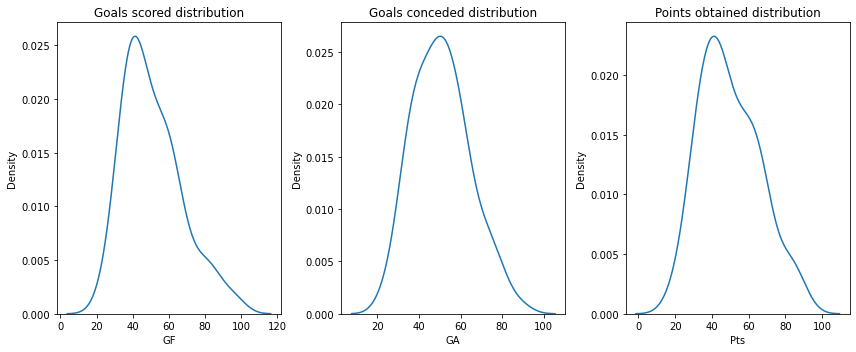

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

sns.kdeplot(ax=axs[0], data=df_main, x="GF")
axs[0].set_title("Goals scored distribution")

sns.kdeplot(ax=axs[1], data=df_main, x="GA")
axs[1].set_title("Goals conceded distribution")

sns.kdeplot(ax=axs[2], data=df_main, x="Pts")
axs[2].set_title("Points obtained distribution")

plt.tight_layout()

plt.show()
